In [32]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Vertical distance between each scan on graph
# (arbitrary units)
Y_SHIFT = 10

In [41]:
# List of sample files to import
# Format for each entry is
# ['filename', 'sample name', scale]
# 
# filename: without .xy extension
# 
# sample name: for displaying on graph
# 
# scale: 1 keeps data as-is, <1 scales peaks to be less intense
#    helpful when graphing amorphous and very crystalline data together 
#    so the scans/large peaks don't overlap vertically
samples = [
    ['silica_fume', 'Silica fume', 1],
    ['magnesium_oxide', 'MgO', 0.3],
    ['hydromagnesite', 'Hydromagnesite', 0.3],
]

all_data = []

for i,s in enumerate(samples):
    data = pd.read_csv(s[0] + '.xy', delimiter=' ', skiprows=1)
    data.columns = ['x','y']
    data['Sample'] = s[1]

    data['y_scaled_shifted'] = data['y']*s[2] + N_CONST*i
    
    all_data.append(data)
    
df = pd.concat(all_data, axis=0, ignore_index=True)

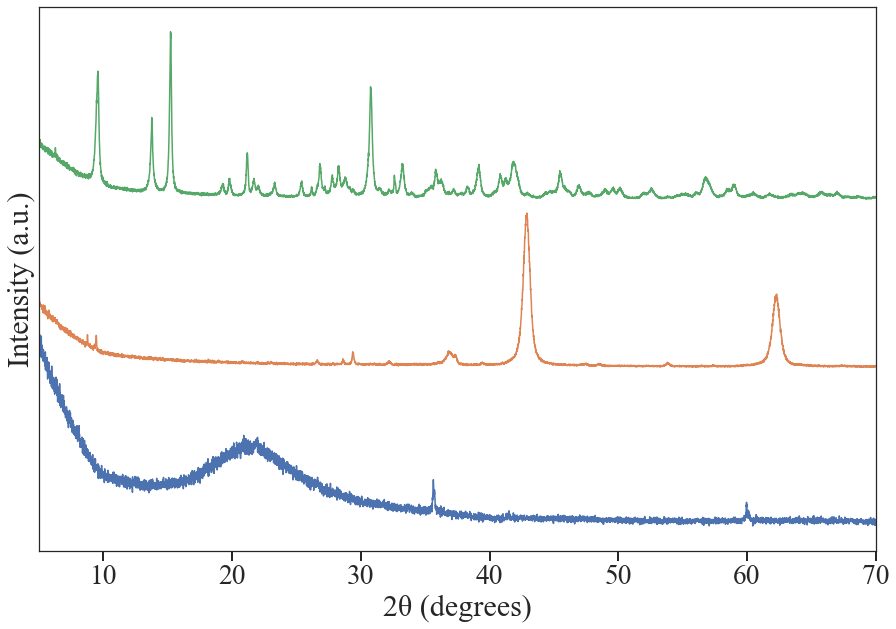

In [42]:
sns.set(font_scale = 2.5)
sns.set_style("white")
plt.rcParams["font.family"] = "Times New Roman"

# You'll need to play around with the
# size of your graph depending on how
# your data looks and how many scans
# you have.
# 
# figsize=(width,height)
f, ax = plt.subplots(figsize=(15, 10))
ax.tick_params(bottom=True, left=False, width=2, length=10)

plot = sns.lineplot(
    data=df,
    hue='Sample',
    x="x",
    y="y_scaled_shifted",
)

plot.set_xlabel("2θ (degrees)")
plot.set_ylabel("Intensity (a.u.)")

# Only display from 5 to 70 degrees 2theta
plot.set_xlim(5,70)

# Remove y-axis ticks and labels
ax.get_yaxis().set_ticks([])

# Remove legend (I prefer to label scans by hand in Adobe Illustrator)
ax.get_legend().remove()

# Save figure as svg to current directory
# I use Adobe Illustrator to add additional annotations
# plt.savefig('filename.svg')